In [ ]:
from google.colab import files

In [ ]:
files.upload()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!ls

sample_data  train.zip


In [ ]:
!unzip train.zip

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets,models,transforms
from torch.utils.data import DataLoader,Dataset,ConcatDataset
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
device="cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
device

'cuda'

In [ ]:
!ls train

cat.0.jpg    cat.19.jpg  cat.47.jpg  cat.75.jpg   dog.103.jpg  dog.22.jpg  dog.50.jpg  dog.79.jpg
cat.100.jpg  cat.1.jpg	 cat.48.jpg  cat.76.jpg   dog.104.jpg  dog.23.jpg  dog.51.jpg  dog.7.jpg
cat.101.jpg  cat.20.jpg  cat.49.jpg  cat.77.jpg   dog.105.jpg  dog.24.jpg  dog.52.jpg  dog.80.jpg
cat.102.jpg  cat.21.jpg  cat.4.jpg   cat.78.jpg   dog.106.jpg  dog.25.jpg  dog.53.jpg  dog.81.jpg
cat.103.jpg  cat.22.jpg  cat.50.jpg  cat.79.jpg   dog.107.jpg  dog.26.jpg  dog.54.jpg  dog.82.jpg
cat.104.jpg  cat.23.jpg  cat.51.jpg  cat.7.jpg	  dog.108.jpg  dog.27.jpg  dog.55.jpg  dog.83.jpg
cat.105.jpg  cat.24.jpg  cat.52.jpg  cat.80.jpg   dog.109.jpg  dog.28.jpg  dog.56.jpg  dog.84.jpg
cat.106.jpg  cat.25.jpg  cat.53.jpg  cat.81.jpg   dog.10.jpg   dog.29.jpg  dog.57.jpg  dog.85.jpg
cat.107.jpg  cat.26.jpg  cat.54.jpg  cat.82.jpg   dog.110.jpg  dog.2.jpg   dog.58.jpg  dog.86.jpg
cat.108.jpg  cat.27.jpg  cat.55.jpg  cat.83.jpg   dog.111.jpg  dog.30.jpg  dog.59.jpg  dog.87.jpg
cat.109.jpg  cat.28.jpg

In [ ]:
file_list=os.listdir("./train")#ファイルのPathを与える

In [ ]:
cat_files=[file_name for file_name in file_list if "cat" in file_name]
dog_files=[file_name for file_name in file_list if "dog" in file_name]

In [ ]:
transform=transforms.Compose([
    transforms.Resize((256,256)),
    transforms.ToTensor()
])

In [ ]:
class CatDogDataset(Dataset):
    def __init__(self,file_list,dir,transform=None):
        self.file_list=file_list
        self.dir=dir
        self.transform=transform
        if "dog" in self.file_list[0]:#ラベルの定義
            self.label=1
        else:
            self.label=0
    def __len__(self):#画像の枚数
        return len(self.file_list)
    def __getitem__(self,idx):
        file_path=os.path.join(self.dir,self.file_list[idx])#file_pathの取得
        img=Image.open(file_path)#file_pathの受け渡し
        if self.transform is not None:#前処理がある場合の処理
            img=self.transform(img)
            return img,self.label

In [ ]:
dir_path="./train"#pathの指定
cat_dataset=CatDogDataset(cat_files,dir_path,transform=transform)#猫データのロード

In [ ]:
dir_path="./train"#pathの指定
dog_dataset=CatDogDataset(dog_files,dir_path,transform=transform)#犬データのロード

In [ ]:
cat_dog_dataset=ConcatDataset([cat_dataset,dog_dataset])#データの結合

In [ ]:
data_loader_train=DataLoader(cat_dog_dataset,batch_size=32,shuffle=True)#deta_loaderの設定
data_loader_val=DataLoader(cat_dog_dataset,batch_size=32,shuffle=True)

In [ ]:
data_iter_train=iter(data_loader_train)
data_iter_val=iter(data_loader_val)

In [ ]:
imgs,labels=next(data_iter_train)
imgs_val,labels_val=next(data_iter_val)

In [ ]:
labels

tensor([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
labels_val

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
        0, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
grid_imgs=torchvision.utils.make_grid(imgs[:24])#最初の24個
grid_imgs_val=torchvision.utils.make_grid(imgs_val[:24])

In [ ]:
grid_imgs_arr=grid_imgs.numpy()#TensorクラスをNumpyクラスに変更
grid_imgs_val_arr=grid_imgs_val.numpy()

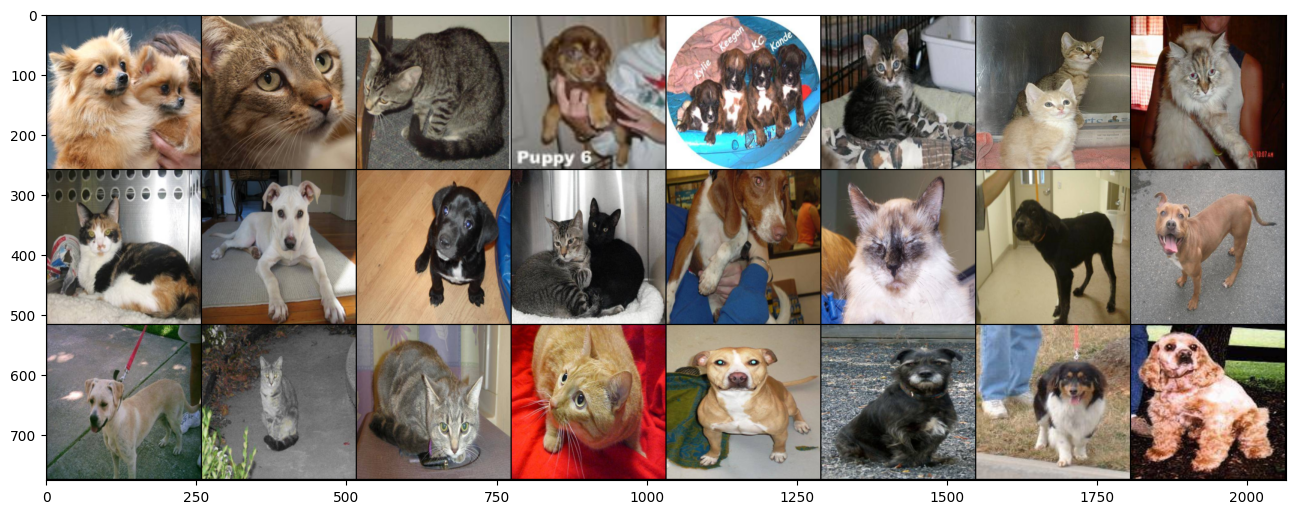

In [ ]:
plt.figure(figsize=(16,24))
plt.imshow(np.transpose(grid_imgs_arr,(1,2,0)))

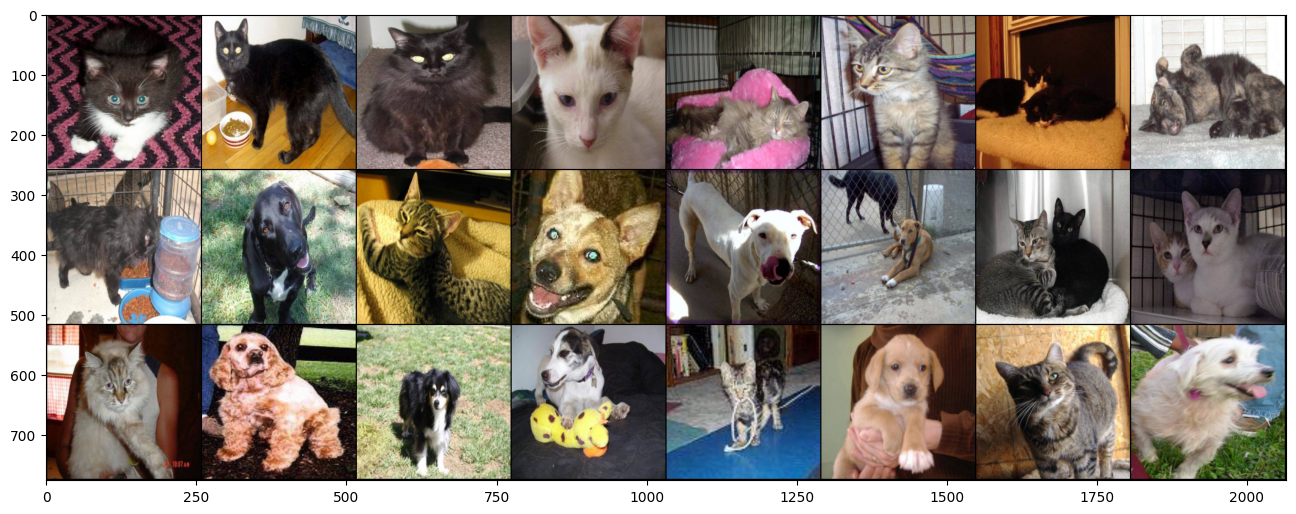

In [ ]:
plt.figure(figsize=(16,24))
plt.imshow(np.transpose(grid_imgs_val_arr,(1,2,0)))